In [1]:
 # Imports
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
import pandas as pd
import os

<div style="border-bottom: 3px solid black;"></div>

### Task 1 &mdash; Text Classification

2. Plot the distribution of the instances in each class and save the graphic in a file called BBC-distribution.pdf.
You may want to use matplotlib.pyplot and savefig to do this. This pre-analysis of the data set will
allow you to determine if the classes are balanced, and which metric is more appropriate to use to evaluate
the performance of your classifier.

['business', 'entertainment', 'politics', 'sport', 'tech']
[510 386 417 511 401]


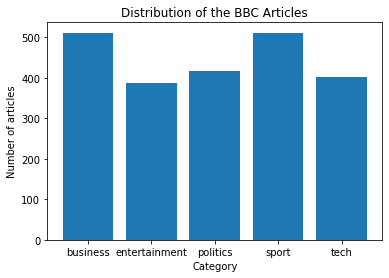

In [2]:
labels = next(os.walk('BBC'))[1]
nb_files_data = np.array([0]*len(next(os.walk('BBC'))[1]))

for i in range(len(next(os.walk('BBC'))[1])):
    _,_,files = next(os.walk("BBC/"+labels[i]))
    nb_files_data[i]=len(files)

print(labels)
print(nb_files_data)

plt.xticks(range(len(nb_files_data)), labels)
plt.xlabel('Category')
plt.ylabel('Number of articles')
plt.title('Distribution of the BBC Articles')
plt.bar(range(len(nb_files_data)), nb_files_data)
#Comment this line below if you want to create the pdf file
plt.show()
#Uncomment this line below if you want to create the pdf file 
#plt.savefig("BBC-distribution.pdf")

3. Load the corpus using load files and make sure you set the encoding to latin1. This will read the file
structure and assign the category name to each file from their parent directory name.

In [3]:
data = load_files("BBC", encoding="latin1")

4. Pre-process the dataset to have the features ready to be used by a multinomial Naive Bayes classifier. This
means that the frequency of each word in each class must be computed and stored in a term-document
matrix. For this, you can use feature extraction.text.CountVectorizer.

In [4]:
cv = CountVectorizer(stop_words='english')
tdm = cv.fit_transform(data.data)
df = pd.DataFrame(tdm.toarray(), columns=cv.get_feature_names())
df

,00,000,0001,000bn,000m,000s,000th,001,001and,001st,...,zooms,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


5. Split the dataset into 80% for training and 20% for testing. For this, you must use train test split with
the parameter random state set to None.

In [5]:
train_data, test_data, train_classes, test_classes = train_test_split(data.data, data.target, test_size=0.2, train_size=0.8, random_state=None)

6. Train a multinomial Naive Bayes Classifier (naive bayes.MultinomialNB) on the training set using the
default parameters and evaluate it on the test set.

In [6]:
def train(smoothing=None):
    if smoothing != None:
        model = MultinomialNB(alpha=smoothing)
    else:
        model = MultinomialNB()
    model.fit(cv.transform(train_data), train_classes)
    predictions = model.predict(cv.transform(test_data))
    return predictions

In [7]:
predictions = train()

7. In a file called bbc-performance.txt, save the following information: (to make it easier for the TAs, make
sure that your output for each sub-question below is clearly marked in your output file, using the headings
(a), (b) . .. )

In [8]:
def generate_performance_file(title, predictions):
    with open("bbc-performance.txt", "a") as file:
        #a)
        file.write("**********************************************\n")
        file.write(f"*****{title}******\n")
        file.write("**********************************************\n\n")
        #b)
        cm = confusion_matrix(test_classes, predictions)
        file.write(str(cm))
        file.write("\n\n")
        #c)
        results = classification_report(test_classes, predictions)
        file.write(results)
        #d)
        file.write(f"\nAccuracy of model: {accuracy_score(test_classes, predictions)}\n")
        file.write(f"Macro-average F1: {f1_score(test_classes, predictions, average='macro')}\n")
        file.write(f"Weighted-average F1: {f1_score(test_classes, predictions, average='weighted')}\n\n")
        #e)
        file.write("Prior probabilites:\n")
        total_docs = sum(nb_files_data)
        for index in range(len(labels)):
            file.write(f"P({labels[index]}) = {nb_files_data[index]/total_docs}\n")
        #f)
        vocab_size = len(cv.vocabulary_)
        file.write(f"\nSize of vocabulary {vocab_size}\n")
        #g)
        document_word_array = tdm.toarray()
        for index in range(len(labels)):
            first_doc_of_class_index = 0 if index is 0 else first_doc_of_class_index + nb_files_data[index-1]
            last_doc_of_class_index = first_doc_of_class_index + nb_files_data[index] - 1
            file.write(f"Number of word tokens in {labels[index]}: {sum(document_word_array[first_doc_of_class_index:last_doc_of_class_index+1].sum(axis=0))}\n")
        #h)
        file.write(f"Number of word tokens in entire corpus: {sum(tdm.toarray().sum(axis=0))}\n")
        #i)
        #???
        #j)
        y = np.array(tdm.toarray())
        num_words_frequency_1 = np.count_nonzero(y.sum(axis=0) == 1)
        percent_words_frequency_1 = (num_words_frequency_1/vocab_size)*100
        file.write(f"Number of words with a frequency of 1: {num_words_frequency_1}\n")
        file.write(f"Percent of words with a frequency of 1: {percent_words_frequency_1}%\n")
        #k)
        #???
        file.write("\n\n")
    

<>:29: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:29: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-8-3fd02468dc28>:29: SyntaxWarning: "is" with a literal. Did you mean "=="?
  first_doc_of_class_index = 0 if index is 0 else first_doc_of_class_index + nb_files_data[index-1]


In [9]:
generate_performance_file("MultinomialNB default values, try 1", predictions)

8. Redo steps 6 and 7 without changing anything (do not redo step 5, the dataset split). Change the
model name to something like “MultinomialNB default values, try 2” and append the results to the file
bbc-performance.txt.

In [10]:
generate_performance_file("MultinomialNB default values, try 2", predictions)

9. Redo steps 6 and 7 again, but this time, change the smoothing value to 0.0001. Append the results at the
end of bbc-performance.txt.

In [ ]:
predictions_smoothing = train(0.0001)
generate_performance_file("MultinomialNB, 0.0001 smoothing", predictions_smoothing)

10. Redo steps 6 and 7, but this time, change the smoothing value to 0.9. Append the results at the end of
bbc-performance.txt

In [ ]:
predictions_smoothing = train(0.9)
generate_performance_file("MultinomialNB, 0.9 smoothing", predictions_smoothing)